# Two layer neural network for handwritten digits

In [4]:
def displayData(X):
    for i in range(28):
        plt.subplot(4, 7, i+1)
        plt.imshow(X[i].reshape(8,8))

In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [6]:
def sigmoidGradient(z):
    g = z * (1-z)
    return g

In [104]:
def initializeWeights(L_in, L_out):
    epsilon = 0.12
    W = np.random.rand(L_out, L_in + 1) * 2 * epsilon - epsilon;
    return W

In [19]:
def predict(X, Theta1, Theta2):
    m = X.shape[0]
    
    p = np.zeros((X.shape[0], 1))
    
    ones = np.ones((1,m))
    a1 = np.append(ones, X.T, axis=0)
    z2 = Theta1@a1;
    a2 = np.append(ones, sigmoid(z2), axis=0)
    z3 = Theta2@a2;
    h = sigmoid(z3);
    
    p = np.argmax(h, axis=0)
    
    return p.reshape(-1,1)

In [80]:
def costFunction(params, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    J = 0
    Theta1 = params[0:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size, -1)
    Theta2 = params[hidden_layer_size*(input_layer_size+1):].reshape(num_labels, -1)
    grad = [np.ones(Theta1.shape), np.ones(Theta2.shape)]
    
    y = np.eye(num_labels)[:,y].squeeze()
    
    ones = np.ones((1,m))
    a1 = np.append(ones, X.T, axis=0)
    z2 = Theta1@a1;
    a2 = np.append(ones, sigmoid(z2), axis=0)
    z3 = Theta2@a2;
    a3 = sigmoid(z3);
    
    h = a3
    J = -1/m * (np.sum(y * np.log(h) + (1-y) * np.log(1-h)) - (_lambda/2)*(np.sum(Theta1[:,1:]**2) + np.sum(Theta1[:,1:]**2)))
    
    dZ3 = a3 - y
                
    grad[1][:,0] = dZ3@a2[0,:].T 
    grad[1][:,1:] = dZ3@a2[1:,:].T + _lambda*Theta2[:,1:] 
                
    dZ2 = Theta2.T@dZ3* sigmoidGradient(a2)

    grad[0][:,0] = (dZ2[1:,:] @ ((a1[0,:].T).reshape(a1.shape[1],1))).reshape(1,-1)
    grad[0][:,1:] = dZ2[1:,:]@a1[1:,:].T + _lambda*Theta1[:,1:] 
    
    grads = np.append(grad[0].reshape(-1)/m, grad[1].reshape(-1)/m )
    
    return J.item(), grads

# Plotting some examples

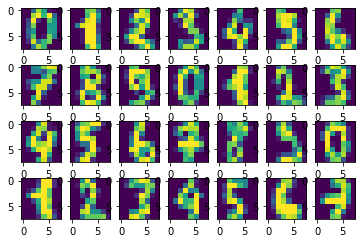

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from scipy import optimize


digits = load_digits()

X = digits.data
y = digits.target.reshape(-1, 1)

m, n = X.shape

displayData(X)

# Training the model

In [122]:
input_layer_size  = n;
hidden_layer_size = 25;
num_labels = 10;        

initial_Theta1 = initializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = initializeWeights(hidden_layer_size, num_labels);

initial_params = np.append(initial_Theta1, initial_Theta2);

_lambda = 1;

J = lambda theta: costFunction(theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)[0]
dJ = lambda theta: costFunction(theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)[1]
all_theta = optimize.fmin_cg(J, initial_params, fprime=dJ, maxiter=400,gtol=0.001)

Theta1 = all_theta[0:hidden_layer_size*(input_layer_size+1)].reshape(hidden_layer_size,-1)
Theta2 = all_theta[hidden_layer_size*(input_layer_size+1):].reshape(num_labels,-1)


y_predict = predict(X, Theta1, Theta2)

print('train accuracy: ',np.mean(1*(y_predict==y))*100,'%')

         Current function value: 0.178277
         Iterations: 400
         Function evaluations: 624
         Gradient evaluations: 624
train accuracy:  99.44351697273233 %


# Predicting a random example

Text(0.5, 1.0, 'predicted: 5')

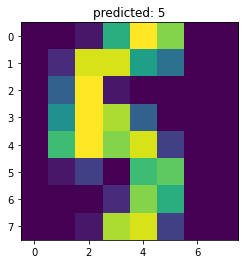

In [123]:
random = np.random.randint(m)
example = X[random].reshape(1,-1)
predicted = predict(example, Theta1, Theta2).item()
plt.imshow(example.reshape(8,8))
plt.title('predicted: '+str(predicted))

# Gradient checking

In [143]:
def gradientChecking(J, theta):
    grad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)

    e = 1e-4;
    for index in range(len(theta)):
        perturb[index] = e
        grad[index] = (J(theta + perturb) - J(theta - perturb)) / (2*e)
        perturb[index] = 0
    
    return grad

In [140]:
def checkGradient(_lambda=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    Theta1 = initializeWeights(input_layer_size, hidden_layer_size)
    Theta2 = initializeWeights(hidden_layer_size, num_labels)
    
    params = np.append(Theta1.reshape(-1), Theta2.reshape(-1))
    
    X  = np.random.rand(m, input_layer_size)
    y  = np.mod(np.arange(m), num_labels)
    
    print("X:",X.shape,"y:", y.shape,"Theta1:",Theta1.shape,"Theta2:", Theta2.shape,"All_theta:", params.shape)
    
    J = lambda theta: costFunction(theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)[0]
    dJ = lambda theta: costFunction(theta, input_layer_size, hidden_layer_size, num_labels, X, y, _lambda)[1]
    
    grad = dJ(params)
    numericalGradient = gradientChecking(J, params)
    
    print(grad,'\n', numericalGradient)

In [144]:
checkGradient()

X: (5, 3) y: (5,) Theta1: (5, 4) Theta2: (3, 6) All_theta: (38,)
[-3.01265559e-03 -2.96648827e-03 -1.44431264e-03 -9.98422844e-04
  6.98509702e-03  4.95004813e-03  2.67154630e-03  8.70468640e-03
  2.63507722e-03  1.06162620e-03  6.60224870e-04  3.38534009e-03
 -1.91778775e-03  1.40112121e-03  5.28540423e-04  2.28726934e-04
 -3.52675205e-03  1.21390137e-04 -8.56742590e-05  7.16112332e-04
  9.34572789e-02  4.76914543e-02  5.49711630e-02  5.12004317e-02
  4.72401913e-02  5.44290874e-02  6.34444232e-02  3.01723842e-02
  2.96909367e-02  3.01184326e-02  2.88101435e-02  2.94560227e-02
  2.85611174e-01  1.37527971e-01  1.57163661e-01  1.49689737e-01
  1.35518370e-01  1.50102619e-01] 
 [-3.01265559e-03 -2.96648827e-03 -1.44431264e-03 -9.98422842e-04
  6.98509701e-03  4.95004812e-03  2.67154630e-03  8.70468640e-03
  2.63507722e-03  1.06162620e-03  6.60224873e-04  3.38534008e-03
 -1.91778775e-03  1.40112121e-03  5.28540423e-04  2.28726931e-04
 -3.52675205e-03  1.21390136e-04 -8.56742610e-05  7.16